# Xinjiang Detention Sites

## Table of Contents

1. Introduction
2. Install & Import Packages
3. Access Data (The Xinjiang Data Project)
4. Prefectures
5. Interactive Map of Sites
6. Buildings by Type

## 1. Introduction

Since 2017, China has instituted the mass internment of >1 million Uighurs, Kazakhs, and other people in Muslim-majority groups in Xinjiang province. The Australian Strategic Policy Institute (ASPI) recently released results from The Xinjiang Data Project (https://xjdp.aspi.org.au/), which uses satellite imagery and local government working group documents to locate, map, and analyze 380 suspected detention sites. It also details the destruction of >16,000 mosques and demolition of 30% of important Islamic cultural sites across southern Xinjiang. Recently, The Economist (https://www.economist.com/china/2020/10/17/how-xinjiangs-gulag-tears-families-apart) and FT (https://www.ft.com/content/6cceb0c1-dc43-48a4-81cc-2debcac0148a) drew from the work and, through interviews, featured chilling added detail of separated families, orphaned children, forced labor, sterilization, and cultural indoctrination. 

Today, we'll plot the number of detention sites for each of the 21 prefectures (sub-provincial), create an interactive zoom & pop-up map of all 380 detention sites using folium highlighting location, name, and security tier, and plot the number of detention buildings by type and year. In addition to working with the dataframe, we'll work with plot styling, grids, and colormaps. The purpose is to visualize the extent and ongoing expansion of the internment program for the public and data scientists interested in digging deeper. If you'd like to explore more on Xinjiang's cultural erasure, including additional visual satellite assets, documents, and data current to September 2020, you can find it here (https://xjdp.aspi.org.au/data/).

## 2. Install & Import Packages

In [112]:
# Import relevant libraries
import requests 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geopy
from geopy.geocoders import Nominatim # convert address into latitude and longitude

!pip install folium
import folium
from folium import plugins 

## 3. Access Data (The Xinjiang Data Project)

In [113]:
# The code was removed by Watson Studio for sharing.

In [114]:
# Read in data
pd.options.display.max_columns = None
xinjiang = pd.read_csv(body)

# Check first few rows
xinjiang.head()

,Number,Name_Code,Lat,Long,Prefecture,County,# Shawn,# ETNAM,Tier,Distance to County Centre,Distance to Industrial Park,Watchtowers,Interior Fencing,External Wall,Have security features been added or removed,Security Features Changed,Security features changed when,Have recreational features been added or removed,Recreational features changed,Usage prior to 2017,Name,Organised visits,Other footage,Other Evidence,Eyewitness Accounts,Any signs of decomissioning,Decomissioning signs,Number of Buildings in 2017,Number of Buildings in 2018,Number of Buildings in 2019,Number of Buildings in 2020,Construction ongoing in 2019?,Construction ongoing in 2020?,Number of factories within the complex,Number of factories adjacent to the complex,Distance to residential buildings,Distance to pre-school (max 1km),Notes(tmp),Notes,Photos,Videos,Date of Latest Sat Imagery,Highlight,Desecuritisation
0,1,Tiemenguan Facility #1,41.796315,85.892923,Tiemenguan,Tiemenguan,NaN,C_KO02,3,33.07,5.7,1.0,1.0,1.0,1.0,an external fence was added,3rdQt2018,0.0,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,15.0,15.0,NaN,0.0,0.0,1.0,0.0,0.6,NaN,Attached to a neighbouring Bingtaun outpost,"A Tier 3 detention centre in Tiemenguan, Tieme...",NaN,NaN,19-Jun,NaN,0.0
1,2,Shawan Facility #1,44.243715,85.958685,Tarbaghatay,Shawan,NaN,P_SH04,4,16.68,0.7,1.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,Barren,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.3,NaN,Seems to be attached to a large forced labour ...,"A Tier 4 prison in Shawan, Tarbaghatay with wa...",NaN,NaN,18-Apr,1.0,0.0
2,3,Korgas Facility #1,44.025014,80.874067,Ili,Korgas,32,C_GH16,1,4.43,NaN,0.0,1.0,1.0,1.0,some internal fencing were removed from outsid...,2019,0.0,NaN,School,NaN,None known,None Known,None known,https://medium.com/@shawnwzhang/satellite-imag...,0.0,NaN,NaN,29.0,29.0,29.0,0.0,0.0,7.0,30.0,0.1,NaN,NaN,"A Tier 1 re-education facility in Korgas, Ili ...",NaN,NaN,20-Mar,NaN,1.0
3,4,Hotan County Facility #1,37.242073,79.859507,Hotan,Hotan County,NaN,C_HO08,3,15.36,2.9,1.0,1.0,1.0,1.0,some internal fencing were added,2ndHf2019,0.0,NaN,Farmland,NaN,NaN,NaN,NaN,NaN,0.0,NaN,8.0,8.0,8.0,18.0,0.0,1.0,6.0,0.0,1.7,1.3,Part of an industrial park,"A Tier 3 detention centre in Hotan County, Hot...",NaN,NaN,20-Apr,NaN,0.0
4,5,Ghulja Facility #1,43.975644,81.500954,Ili,Ghulja,NaN,C_GH08,1,21.67,0.1,0.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,School,NaN,NaN,NaN,NaN,NaN,1.0,Most inner city Ghulja camps appear to have be...,7.0,7.0,6.0,8.0,0.0,1.0,0.0,2.0,0.1,NaN,NaN,"A Tier 1 re-education facility in Ghulja, Ili ...",NaN,NaN,20-Apr,NaN,0.0


In [115]:
# Keep relevant columns we'll focus on here
# Tier indicates type of security: 1 - lower security re-education, 2 - dedicated re-education, 3 - detention center, 4 - max security prison

keep = ['Name_Code', 'Lat', 'Long', 'Prefecture', 'County', 'Tier', 'Usage prior to 2017', 'Number of Buildings in 2017', 'Number of Buildings in 2018', 'Number of Buildings in 2019', 'Number of Buildings in 2020']
xinjiang = xinjiang[keep]
xinjiang

,Name_Code,Lat,Long,Prefecture,County,Tier,Usage prior to 2017,Number of Buildings in 2017,Number of Buildings in 2018,Number of Buildings in 2019,Number of Buildings in 2020
0,Tiemenguan Facility #1,41.796315,85.892923,Tiemenguan,Tiemenguan,3,Farmland,0.0,15.0,15.0,NaN
1,Shawan Facility #1,44.243715,85.958685,Tarbaghatay,Shawan,4,Barren,0.0,6.0,6.0,6.0
2,Korgas Facility #1,44.025014,80.874067,Ili,Korgas,1,School,NaN,29.0,29.0,29.0
3,Hotan County Facility #1,37.242073,79.859507,Hotan,Hotan County,3,Farmland,8.0,8.0,8.0,18.0
4,Ghulja Facility #1,43.975644,81.500954,Ili,Ghulja,1,School,7.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
375,Chinggil Facility #2,46.675626,90.293397,Altay,Chinggil,3,NaN,NaN,NaN,NaN,NaN
376,Mongolkure Facility #3,43.180390,81.134432,Ili,Mongolkure,4,NaN,NaN,3.0,3.0,3.0
377,Kuytun Facility #3,44.411585,85.068795,Ili,Kuytun,4,NaN,4.0,7.0,7.0,NaN
378,Tiemenguan Facility #5,41.881987,85.595007,Tiemenguan,Tiemenguan,4,NaN,NaN,NaN,2.0,NaN


In [116]:
# Check updated dataframe info. We have 380 sites and 11 columns. 
# Notice the data type for the number of buildings columns are floats. Let's keep this in mind as we'll need to change those to integers later
xinjiang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name_Code                    380 non-null    object 
 1   Lat                          380 non-null    float64
 2   Long                         380 non-null    float64
 3   Prefecture                   380 non-null    object 
 4   County                       380 non-null    object 
 5   Tier                         380 non-null    int64  
 6   Usage prior to 2017          239 non-null    object 
 7   Number of Buildings in 2017  235 non-null    float64
 8   Number of Buildings in 2018  270 non-null    float64
 9   Number of Buildings in 2019  330 non-null    float64
 10  Number of Buildings in 2020  232 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 32.8+ KB


In [117]:
# Check null values
xinjiang.isnull().sum()

Name_Code                        0
Lat                              0
Long                             0
Prefecture                       0
County                           0
Tier                             0
Usage prior to 2017            141
Number of Buildings in 2017    145
Number of Buildings in 2018    110
Number of Buildings in 2019     50
Number of Buildings in 2020    148
dtype: int64

## 4. Prefectures

In [118]:
# Check the number of unique prefectures, which is the sub-provincial geographic category, using .nunique(). We have 21 prefectures
xinjiang.Prefecture.nunique()

21

In [119]:
# Number of sites in each prefecture
xinjiang.Prefecture.value_counts()

Kashgar        73
Hotan          52
Ili            46
Aksu           32
Bayingolun     27
Urumqi         25
Tarbaghatay    21
Sanji          20
Kizilsu        17
Turpan         14
Altay          12
Qumul           9
Tumshuq         7
Bortala         6
Tiemenguan      5
Karamay         5
Beitun          3
Aral            3
Wujiaqu         1
Shihezi         1
Shuanghe        1
Name: Prefecture, dtype: int64

Text(0.5, 0, 'Number of Sites')

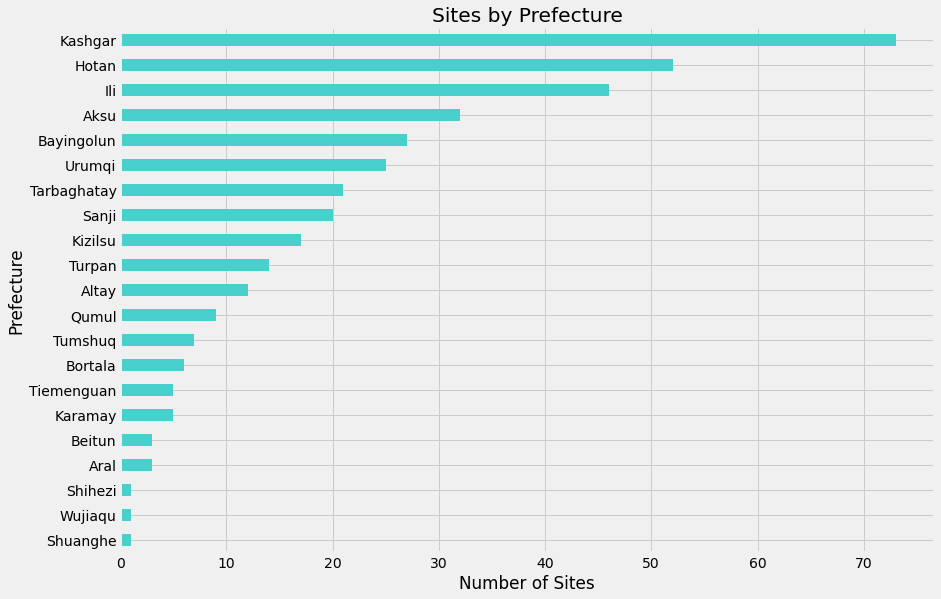

In [120]:
# Horizontal bar plot

# Sort using .sort_values() so top bar represents highest count
prefectures = xinjiang.Prefecture.value_counts().sort_values()

# Horizontal bar plot
plt.figure(figsize=(13,9))
prefectures.plot(kind='barh', color='mediumturquoise')
plt.title('Sites by Prefecture')
plt.ylabel('Prefecture')
plt.xlabel('Number of Sites')

## 5. Interactive Map of Sites

In [121]:
# Use geopy to obtain latitude and longitude of Xinjiang
address = 'Xinjiang, China'
geolocator = Nominatim(user_agent="xinjiang_explorer") # Need to define user_agent in order to instantiate geocoder. Here we use ny_explorer as the name of the user_agent
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude

print('The latitude and longitude of Xinjiang are {}, {}.'.format(lat, long))

The latitude and longitude of Xinjiang are 42.4804953, 85.4633464.


In [122]:
# Visualize Xinjiang with interactive zoom and pop-up map using folium and latitude, longitude values we obtained above
map_xinjiang = folium.Map(location=[lat, long], zoom_start=5.2, tiles='Stamen Terrain')

# Set color scheme for the tiers
k=4 #4 tiers
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, long, name, tier in zip(xinjiang['Lat'], xinjiang['Long'], xinjiang['Name_Code'], xinjiang['Tier']):
    label = folium.Popup(str(name) + ' Tier ' + str(tier), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=3,
        popup=label,
        color=rainbow[tier-1],
        fill=True,
        fill_color=rainbow[tier-1],
        fill_opacity=0.7).add_to(map_xinjiang)
       
map_xinjiang

## 6. Buildings by Type

In [123]:
# Keep only relevant columns
keep = ['Tier','Number of Buildings in 2017', 'Number of Buildings in 2018', 'Number of Buildings in 2019', 'Number of Buildings in 2020']

# Sites data frame. Drop null values - this would be most appropriate here (instead of mode) as satellite data is missing or unclear
sites = xinjiang[keep].dropna()

sites = sites.rename(columns={'Number of Buildings in 2017': '2017', 'Number of Buildings in 2018': '2018', 'Number of Buildings in 2019':'2019', 'Number of Buildings in 2020':'2020'})

# Remember we had float types for the number of sites for each year, let's change the data type for all columns to integer 
sites = sites.astype(int)

# Chck first frew rows
sites.head()

,Tier,2017,2018,2019,2020
1,4,0,6,6,6
3,3,8,8,8,18
4,1,7,7,6,8
5,4,4,4,7,7
9,3,8,8,11,11


In [124]:
# Group by tier using .groupby and sum number of sites each year using .sum 
sites = sites.groupby(['Tier']).sum()[['2017','2018', '2019', '2020']]
sites

,2017,2018,2019,2020
Tier,,,,
1,407,508,560,563
2,373,533,707,708
3,222,437,485,568
4,340,473,523,542


In [125]:
# Transpose to get years as the index and tier as the columns so years will plot as the x-axis 
sites = sites.transpose()

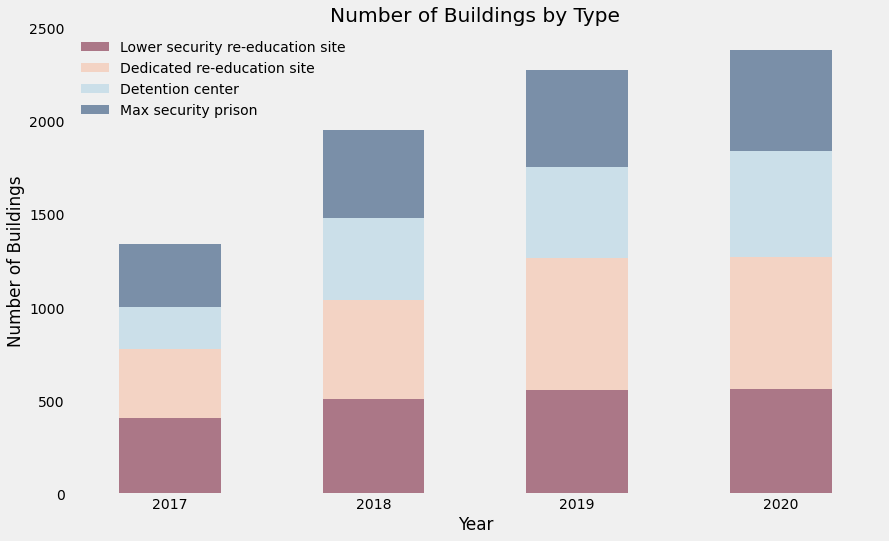

In [126]:
# Plot number of buildings by type and year. 
# 2020 is current up to September 2020. Continuing the trend, we can expect the total to surpass 2,500 buildings when we check back at the end of the year. 

# Call FiveThirtyEight style for plot
mpl.style.use("fivethirtyeight")

# Area plot of Xinjiang sites by type 
sites.plot(kind='bar', stacked=True, alpha = 0.5, figsize=(13, 8), cmap='RdBu')
plt.title('Number of Buildings by Type')
plt.ylabel('Number of Buildings')
plt.xlabel('Year')
plt.legend(labels=["Lower security re-education site","Dedicated re-education site","Detention center", "Max security prison"], frameon=False)
plt.xticks(rotation='horizontal')
plt.grid(b=None)
plt.show()